# Symbolic computation

In [1]:
from sympy import * # Symbolic computation package
init_printing(use_latex=True) # Latex display on notebook

In [2]:
X, Y = symbols('X Y') # Defining variables as algebraic symbols
w, b, d, u = symbols('omega beta delta mu') # also parameters

In [3]:
System = Matrix([X*(w-b*Y), Y*(b*d*X-u)]) # Define the system matrix A: X'=A
Vars = Matrix([X, Y]) # Define the vector of variables
J = System.jacobian(Vars) # The Jacobian of the system
System, J

⎛⎡X⋅(-Y⋅β + ω) ⎤  ⎡-Y⋅β + ω    -X⋅β   ⎤⎞
⎜⎢             ⎥, ⎢                   ⎥⎟
⎝⎣Y⋅(X⋅β⋅δ - μ)⎦  ⎣ Y⋅β⋅δ    X⋅β⋅δ - μ⎦⎠

In [4]:
sol = solve(System, Vars) # Solve for roots = fixed points
sol

In [5]:
sol1 = J.subs(list(zip(Vars,sol[1]))) # Calculate the jacobian for a fixed point
sol[1], sol1, sol1.eigenvals() # Show the fixed point, the Jacobian at the point, the eigenvalues at the point

⎛          ⎡     -μ ⎤                             ⎞
⎜⎛ μ   ω⎞  ⎢ 0   ───⎥  ⎧   ______       ______   ⎫⎟
⎜⎜───, ─⎟, ⎢      δ ⎥, ⎨-╲╱ -μ⋅ω : 1, ╲╱ -μ⋅ω : 1⎬⎟
⎜⎝β⋅δ  β⎠  ⎢        ⎥  ⎩                         ⎭⎟
⎝          ⎣δ⋅ω   0 ⎦                             ⎠

In [6]:
sol1.eigenvects() # Eigenvectors at the point

⎡⎛              ⎡⎡    μ     ⎤⎤⎞  ⎛             ⎡⎡   -μ     ⎤⎤⎞⎤
⎢⎜              ⎢⎢──────────⎥⎥⎟  ⎜             ⎢⎢──────────⎥⎥⎟⎥
⎢⎜   ______     ⎢⎢    ______⎥⎥⎟  ⎜  ______     ⎢⎢    ______⎥⎥⎟⎥
⎢⎜-╲╱ -μ⋅ω , 1, ⎢⎢δ⋅╲╱ -μ⋅ω ⎥⎥⎟, ⎜╲╱ -μ⋅ω , 1, ⎢⎢δ⋅╲╱ -μ⋅ω ⎥⎥⎟⎥
⎢⎜              ⎢⎢          ⎥⎥⎟  ⎜             ⎢⎢          ⎥⎥⎟⎥
⎣⎝              ⎣⎣    1     ⎦⎦⎠  ⎝             ⎣⎣    1     ⎦⎦⎠⎦

In [7]:
sol1.det(), sol1.trace(), sol1.trace()**2 - 4*sol1.det() # Determinant, trace, and delta

# Numerical Analysis

In [8]:
import numpy as np # Numerical objects

from scipy.integrate import odeint # Numerical integration function from the scientific programming package

import matplotlib.pyplot as plt # Visualization package
%matplotlib inline

In [9]:
def LotkaVolterra(y0,w,b,d,u,time):
# Function defining the model. Inputs initial conditions, parameters and maxtime, outputs time and trajectories arrays
    
    def System(y,t,w,b,d,u): # Function defining the system of differential equations
        X, Y = y
        
        dX = X*(w - b*Y)
        dY = Y*(b*d*X - u)
        

        dydt = [dX,dY]
        return dydt
    
    

    T = np.linspace(0,time,100*time+1) # Time array. We integrate the function for these time values
    sol = odeint(System, y0, T, args=(w,b,d,u,)) # Call odeint to integrate the system

    return sol,T

In [10]:
# Parameter Values

w = 0.8
b = 0.1
d = 1
u = 1.2

maxtime = 30

Text(0.5, 0, 'Time')

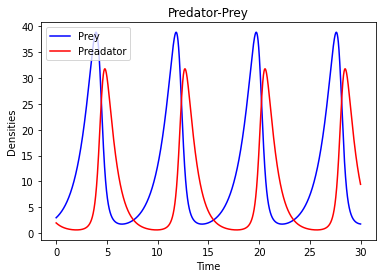

In [11]:
y0 = [3,2] # Initial condition
sol,solT = LotkaVolterra(y0,w,b,d,u,maxtime) # Call the model

X, Y = sol.T

plt.plot(solT,X, label="Prey", c='blue')
plt.plot(solT,Y, label="Preadator", c='red')

plt.legend(loc='best')
plt.title('Predator-Prey')
plt.ylabel('Densities')
plt.xlabel('Time')

Text(0.5, 0, 'Prey')

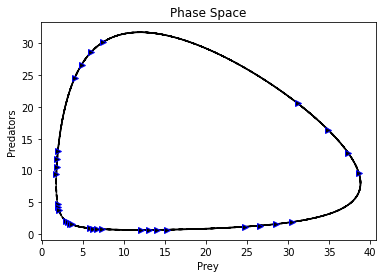

In [12]:
# Phase space

y0 = [3,2]
sol,solT = LotkaVolterra(y0,w,b,d,u,maxtime)

X, Y = sol.T

plt.plot(X,Y,'-->', c='black', markevery=100, markeredgecolor='blue')

plt.title('Phase Space')
plt.ylabel('Predators')
plt.xlabel('Prey')

In [13]:
# Function for plotting an array of initial conditions
def plot_initial(y0):
  
  for i in range(len(y0)):
    sol,solT = LotkaVolterra(y0[i],w,b,d,u,maxtime)
    X, Y = sol.T
    plt.plot(X,Y, c='black')

Text(0.5, 0, 'Prey')

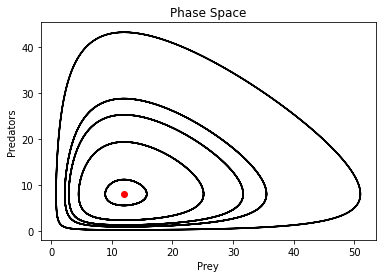

In [14]:
# Trajectories in phase space with fixed point

plt.scatter(u/(b*d),w/b,c='red')

y0 = [[10,6],[4,3],[1,3],[5,5],[8,1]]
plot_initial(y0)

plt.title('Phase Space')
plt.ylabel('Predators')
plt.xlabel('Prey')

Text(0.5, 0, 'Prey')

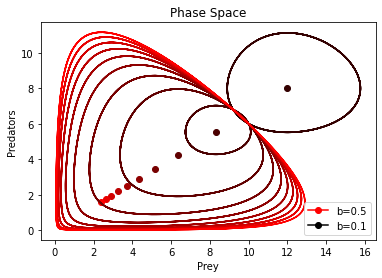

In [15]:
# How the densities vary with the predation rate?

for bb in np.linspace(0.1,0.5,10):
  plt.scatter(u/(bb*d),w/bb,color=[2*bb,0,0])

  sol,solT = LotkaVolterra([10,6],w,bb,d,u,maxtime)
  X, Y = sol.T
  plt.plot(X,Y, color=[2*bb,0,0])




from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='red', label='b=0.5'),
                   Line2D([0], [0], marker='o', color='black', label='b=0.1',)]
plt.legend(handles=legend_elements, loc='best')



plt.title('Phase Space')
plt.ylabel('Predators')
plt.xlabel('Prey')

# SIR model

In [16]:
def SIR(y0,b,g,time):
    
    def System(y,t,b,g):
        S, I, R = y
        
        dS = -b*S*I
        dI = b*S*I - g*I
        dR = g*I
        

        dydt = [dS,dI,dR]
        return dydt
    
    

    T = np.linspace(0,time,100*time+1)
    sol = odeint(System, y0, T, args=(b,g,))

    return sol,T

In [17]:
# Parameter Values

b = 2
g = 1

maxtime = 20

Text(0.5, 0, 'Time')

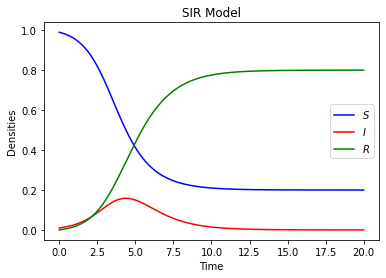

In [18]:
y0 = [0.99,0.01,0]
sol,solT = SIR(y0,b,g,maxtime)

S, I, R = sol.T

plt.plot(solT,S, label="$S$", c='blue')
plt.plot(solT,I, label="$I$", c='red')
plt.plot(solT,R, label="$R$", c='green')

plt.legend(loc='best')
plt.title('SIR Model')
plt.ylabel('Densities')

plt.xlabel('Time')

Text(0, 0.5, 'I')

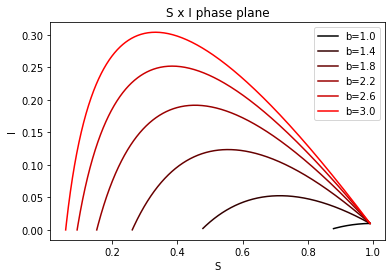

In [19]:
initial = 1
final = 3
num = 6

for bb in np.linspace(initial,final,num):
  sol,solT = SIR(y0,bb,g,maxtime)
  S, I, R = sol.T
  plt.plot(S,I, color=[(bb-initial)/(final-initial),0,0],label='b='+str(bb))

plt.legend()
plt.title('S x I phase plane')
plt.xlabel('S')
plt.ylabel('I')